# Logistic Regression


In this notebook, we will perform logistic regression and then evaluate the model's performance.

Logistic Regression is a method used for classification of data. It estimates posterior probabilities (the probability that the data point belongs to a class) and based on that it classifies the data point. 

### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay, RocCurveDisplay,PrecisionRecallDisplay
import pickle

import diagnosis

### Load the data

In [2]:
train_data = pd.read_csv('../data/train.csv')
val_data = pd.read_csv('../data/val.csv')
test_data = pd.read_csv('../data/test.csv')

### Preparing for training and validation

In [3]:
X_train,X_val,y_train,y_val = diagnosis.preprocessing(train_data, val_data)

### Built the model and training

In [4]:
# Built the model
model = diagnosis.logistic_regression(X_train,y_train)

# get the predictions
y_preds = diagnosis.logistic_regression_predict(model, X_val)

### Function for all the measured metrics

In [5]:
# get the necessary metrics
diagnosis.get_metrics(y_preds,y_val)

Accuracy is: 0.9278350515463918
Precision is: 0.8857142857142857
Recall is: 0.9117647058823529
F1 score is: 0.8985507246376812


### Creating confusion matrix and Saving it

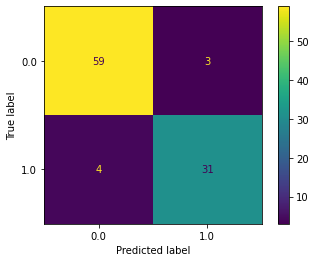

In [6]:
ConfusionMatrixDisplay.from_predictions(y_val,y_preds);
plt.savefig('../figures/confusion_matrix_logistic.png')

### Create the ROC Curve and Saving it

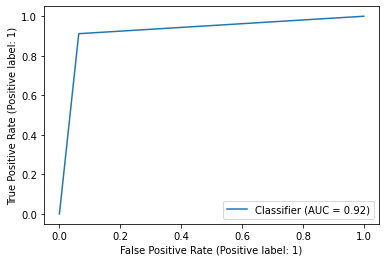

In [7]:
RocCurveDisplay.from_predictions(y_preds,y_val);
plt.savefig('../figures/roc_curve_logistic');

### Create Precision Recall Curve and Saving it

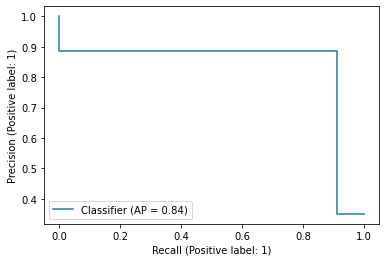

In [8]:
PrecisionRecallDisplay.from_predictions(y_preds,y_val);
plt.savefig('../figures/precision_recall_curve_logistic');

In [9]:
# save the linear model to disk
filename = '../models/lg_model.sav'
pickle.dump(model, open(filename, 'wb'))